# Assignment 3

Import the necessary libraries required for this assignment.

In [113]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.datasets as datasets
import tensorflow.keras.utils as utils

import numpy as np
import matplotlib.pyplot as pl

We will load the CIFAR10 dataset.

These are color images (32x32) classified
into 10 categories.

In [41]:
N = 10000

data = keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = data
x_train = x_train[:N]
y_train = y_train[:N]

x_train = x_train / 255
x_test = x_test / 255

Here are the categories for the input images.

In [42]:
labels = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

Here is a helper function to help you explore the data.

In [43]:
def plot_by_label(label, n):
    idx = labels.index(label)
    I = np.where(y_train == idx)[0]
    I = I[:n]
    for k,i in enumerate(I):
        pl.subplot(1, n, k+1)
        pl.imshow(x_train[i])

## Work Unit 1: Examine the dataset

In this assignment, use the `plot_by_label` or other functions to examine the training
dataset.

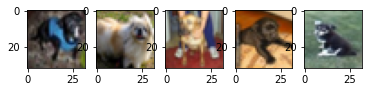

In [44]:
# Try to plot some dogs with
plot_by_label('dog', 5)

## Work Unit 2: Base line model using a linear classifier

Let's try to build the simplest classifier
over the 10 categories using a single layer linear classifier with a softmax activation function.

Make sure you 

In [45]:
def build_linear_classifier():
    model = models.Sequential([
        layers.Input(shape=(3,32,32)),
        layers.Flatten(name='flatten'),
        layers.Dense(10, activation='softmax', name='dense')
    ], name="linear_classifier")
    return model

In [46]:
model1 = build_linear_classifier()
model1.summary()

Model: "linear_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


We fix the training for *all* models in order to give them a fair comparison for the purpose of this assignment.

1. 5 epochs

2. use default Adam() optimizer

3. use 10% training data for cross validation

In [47]:
def train(model):
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['acc'])
    return model.fit(x_train, y_train,
                    epochs=5,
                    validation_split=0.1)

In [48]:
log1 = train(model1)

Epoch 1/5
282/282 [==============================] - 2s 5ms/step - loss: 2.2159 - acc: 0.2207 - val_loss: 1.9398 - val_acc: 0.2850
Epoch 2/5
282/282 [==============================] - 1s 4ms/step - loss: 1.9130 - acc: 0.3223 - val_loss: 1.9803 - val_acc: 0.3140
Epoch 3/5
282/282 [==============================] - 1s 4ms/step - loss: 1.8700 - acc: 0.3593 - val_loss: 1.9981 - val_acc: 0.2990
Epoch 4/5
282/282 [==============================] - 1s 4ms/step - loss: 1.8526 - acc: 0.3606 - val_loss: 1.9381 - val_acc: 0.3370
Epoch 5/5
282/282 [==============================] - 1s 4ms/step - loss: 1.7886 - acc: 0.3813 - val_loss: 1.9725 - val_acc: 0.3230


Your linear classifier model should exceed 30% accuracy.

Note, random guessing gives you 1/10 = 10% accuracy.

In [49]:
log1.history['val_acc'][-1] > 0.3

True

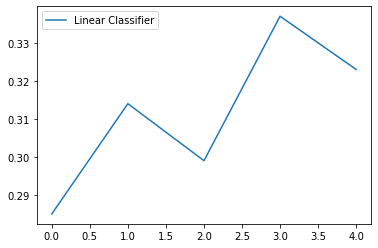

In [50]:
pl.plot(log1.history['val_acc']);
pl.legend(['Linear Classifier'], loc='upper left');

## Work Unit 4: Multi-dense layer network

For historical reasons, multi-dense layer networks are also called multi-layer perceptrons (MLP).

Build a two layer MLP, with

- the hidden dense layer with output (100,)
  using the `relu` activation function.
  
- the output dense layer with output (10,)
  using the softmax activiation function.
  
Name sure you name your model and layers as required by the check.

In [77]:
def build_mlp():
    model = models.Sequential([
        layers.Input(shape=(32,32,3)),
        layers.Flatten(name='flatten'),
        layers.Dense(100, activation='relu', name='dense1'),
        layers.Dense(10, activation='softmax', name='dense2')
    ], name="mlp")
    return model

In [78]:
model2 = build_mlp()
model2.summary()

Model: "mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               307300    
_________________________________________________________________
dense2 (Dense)               (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


In [79]:
log2 = train(model2)

Epoch 1/5
282/282 [==============================] - 3s 9ms/step - loss: 2.2147 - acc: 0.2020 - val_loss: 1.9976 - val_acc: 0.2790
Epoch 2/5
282/282 [==============================] - 3s 9ms/step - loss: 1.9305 - acc: 0.3189 - val_loss: 1.8724 - val_acc: 0.3050
Epoch 3/5
282/282 [==============================] - 3s 9ms/step - loss: 1.8552 - acc: 0.3407 - val_loss: 1.8340 - val_acc: 0.3540
Epoch 4/5
282/282 [==============================] - 3s 9ms/step - loss: 1.7934 - acc: 0.3667 - val_loss: 1.8043 - val_acc: 0.3480
Epoch 5/5
282/282 [==============================] - 2s 8ms/step - loss: 1.7660 - acc: 0.3707 - val_loss: 1.8166 - val_acc: 0.3450


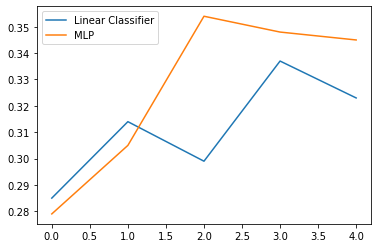

In [80]:
pl.plot(log1.history['val_acc']);
pl.plot(log2.history['val_acc']);
pl.legend(['Linear Classifier', 'MLP'], loc='upper left');

## Work Unit 5: Conv2D with Max Pooling

In this work unit, you are to build a network with:

1. A Conv2D layer with 32 filters of kernel size of 3x3, and `padding="same"`.


2. A maxpooling layer with pool size of 2x2.


3. Finally, the output should be flattened, and transformed by a dense layer with output shape of `(10,)` with softmax activation function.

Name your model and layers as required.

In [55]:
def build_conv2d():
    model = models.Sequential([
        layers.Input(shape=(32,32,3)),
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', name='conv2d'),
        layers.MaxPooling2D(pool_size=(2, 2), name='maxpooling'),
        layers.Flatten(name='flatten'),
        layers.Dense(10, activation='softmax', name='dense')
    ], name="conv2d")
    return model

In [56]:
model3 = build_conv2d()
model3.summary()

Model: "conv2d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
maxpooling (MaxPooling2D)    (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [57]:
log3 = train(model3)

Epoch 1/5
282/282 [==============================] - 11s 39ms/step - loss: 1.9661 - acc: 0.3018 - val_loss: 1.6211 - val_acc: 0.4520
Epoch 2/5
282/282 [==============================] - 10s 35ms/step - loss: 1.5829 - acc: 0.4585 - val_loss: 1.5537 - val_acc: 0.4570
Epoch 3/5
282/282 [==============================] - 10s 35ms/step - loss: 1.4310 - acc: 0.5031 - val_loss: 1.5011 - val_acc: 0.4830
Epoch 4/5
282/282 [==============================] - 10s 36ms/step - loss: 1.3770 - acc: 0.5307 - val_loss: 1.4804 - val_acc: 0.4870
Epoch 5/5
282/282 [==============================] - 10s 36ms/step - loss: 1.2572 - acc: 0.5664 - val_loss: 1.4289 - val_acc: 0.5110


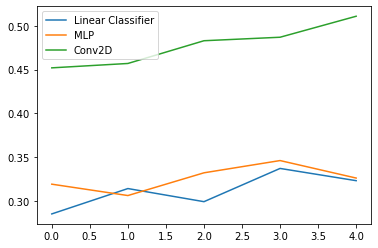

In [58]:
pl.plot(log1.history['val_acc']);
pl.plot(log2.history['val_acc']);
pl.plot(log3.history['val_acc']);
pl.legend(['Linear Classifier', 'MLP', 'Conv2D'], loc='upper left');

## Work Unit 6: Deep Conv2D network

In this workunit, you are to build a network with two layers of conv2d following by maxpooling.

The layers following the input should be:

1. Conv2D with 32 filters of kernel size of (3x3) with padding.


2. Max pooling with pool size of (2,2).


3. Another Conv2D with 64 filters of size (3,3) with padding.


4. Another max pooling with pool size of (2,2).


5. Finally, the tensor is flattened and processed by dense layer with output shape of (10,) using softmax activation.

In [59]:
def build_deep_conv2d():
    model = models.Sequential([
        layers.Input(shape=(32,32,3)),
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', name='conv2d_1'),
        layers.MaxPooling2D(pool_size=(2, 2), name='maxpooling_1'),
        layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', name='conv2d_2'),
        layers.MaxPooling2D(pool_size=(2, 2), name='maxpooling_2'),
        layers.Flatten(name='flatten'),
        layers.Dense(10, activation='softmax', name='dense')
    ], name="deep_conv2d")
    return model

In [60]:
model4 = build_deep_conv2d()
model4.summary()

Model: "deep_conv2d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
maxpooling_1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
maxpooling_2 (MaxPooling2D)  (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                40970     
Total params: 60,362
Trainable params: 60,362
Non-trainable params: 0
___________________________________________________

In [61]:
log4 = train(model4)

Epoch 1/5
282/282 [==============================] - 25s 89ms/step - loss: 1.9131 - acc: 0.3124 - val_loss: 1.5422 - val_acc: 0.4470
Epoch 2/5
282/282 [==============================] - 25s 88ms/step - loss: 1.4673 - acc: 0.4882 - val_loss: 1.4001 - val_acc: 0.4960
Epoch 3/5
282/282 [==============================] - 24s 86ms/step - loss: 1.2797 - acc: 0.5568 - val_loss: 1.3292 - val_acc: 0.5390
Epoch 4/5
282/282 [==============================] - 24s 86ms/step - loss: 1.1765 - acc: 0.5927 - val_loss: 1.3753 - val_acc: 0.5160
Epoch 5/5
282/282 [==============================] - 24s 85ms/step - loss: 1.0498 - acc: 0.6422 - val_loss: 1.2158 - val_acc: 0.5770


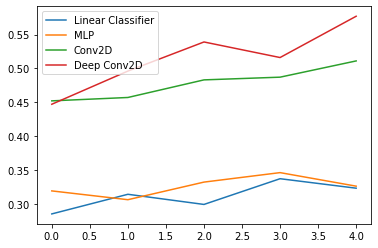

In [63]:
pl.plot(log1.history['val_acc']);
pl.plot(log2.history['val_acc']);
pl.plot(log3.history['val_acc']);
pl.plot(log4.history['val_acc']);
pl.legend(['Linear Classifier', 'MLP', 'Conv2D', 'Deep Conv2D'], loc='upper left');

## Work Unit 7: your own network

In order to maximize accuracy, we can apply many additional network architectures including
applying non-linear activation functions after each Conv2D layers.

The `Conv2D(..., activation="...")` supports the `activation=...` argument for you to specify activation functions with ease.

Additional Conv2D layers can be added.

We can also add more Dense layers after the tensor is flattened.

Feel free to build any reasonable network in this work unit.

In [145]:
def build_my_network():
    model = models.Sequential([
        layers.Input(shape=(32,32,3)),
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', name='conv2d_1'),
        layers.MaxPooling2D(pool_size=(2, 2), name='maxpooling_1'),
        layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', name='conv2d_2'),
        layers.MaxPooling2D(pool_size=(2, 2), name='maxpooling_2'),
        layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', name='conv2d_3'),
        layers.MaxPooling2D(pool_size=(2, 2), name='maxpooling_3'),
        layers.Flatten(name='flatten'),
        layers.Dense(32, activation='relu', name='dense1'),
        layers.Dense(10, activation='softmax', name='dense2')
    ], name="my_network")
    return model

In [146]:
model5 = build_my_network()
model5.summary()

Model: "my_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
maxpooling_1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
maxpooling_2 (MaxPooling2D)  (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
maxpooling_3 (MaxPooling2D)  (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [147]:
log5 = train(model5)

Epoch 1/5
282/282 [==============================] - 39s 137ms/step - loss: 1.9920 - acc: 0.2583 - val_loss: 1.5646 - val_acc: 0.4350
Epoch 2/5
282/282 [==============================] - 36s 129ms/step - loss: 1.4509 - acc: 0.4842 - val_loss: 1.2958 - val_acc: 0.5240
Epoch 3/5
282/282 [==============================] - 37s 133ms/step - loss: 1.1953 - acc: 0.5781 - val_loss: 1.2053 - val_acc: 0.5550
Epoch 4/5
282/282 [==============================] - 36s 129ms/step - loss: 1.0082 - acc: 0.6455 - val_loss: 1.2138 - val_acc: 0.5700
Epoch 5/5
282/282 [==============================] - 35s 124ms/step - loss: 0.8508 - acc: 0.7039 - val_loss: 1.1085 - val_acc: 0.6140


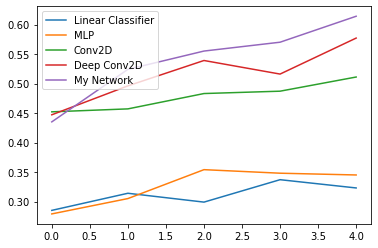

In [148]:
pl.plot(log1.history['val_acc']);
pl.plot(log2.history['val_acc']);
pl.plot(log3.history['val_acc']);
pl.plot(log4.history['val_acc']);
pl.plot(log5.history['val_acc']);
pl.legend(['Linear Classifier', 'MLP', 'Conv2D', 'Deep Conv2D', 'My Network'], loc='upper left');

## Work Unit 7: Model capacity vs performance

In this work unit, you are to plot the model capacity vs the best cross validation accuracy of all the models.

The model capacity is defined as the number of model parameters.

Models' capacities = [30730, 308310, 82826, 60362, 159146]
Best cross-validation accuracies = [0.3370000123977661, 0.3540000021457672, 0.5109999775886536, 0.5770000219345093, 0.6140000224113464]


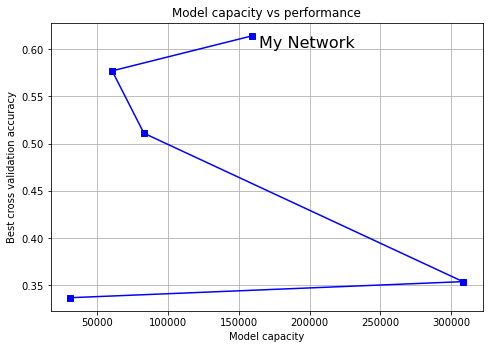

In [163]:
#
# Plot the model capacity vs the best cross validation accuracy.
#
x = []
y = []
x.append(model1.count_params())
x.append(model2.count_params())
x.append(model3.count_params())
x.append(model4.count_params())
x.append(model5.count_params())
print("Models' capacities =",  x)
y.append(np.amax(log1.history['val_acc']))
y.append(np.amax(log2.history['val_acc']))
y.append(np.amax(log3.history['val_acc']))
y.append(np.amax(log4.history['val_acc']))
y.append(np.amax(log5.history['val_acc']))
print("Best cross-validation accuracies =", y)
fig = pl.figure()
pl.plot(x,y)
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(x,y,'bs-') # solid line with blue colour and square marker
ax.set_title("Model capacity vs performance")
ax.set_xlabel("Model capacity")
ax.set_ylabel("Best cross validation accuracy")
ax.grid(True)
ax.annotate('My Network',xy=(x[4]+73000, y[4]),fontsize=16,
            horizontalalignment='right', verticalalignment='top')
pl.show()